In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import glob
import os

In [115]:
df = pd.read_csv('Mt_Everest_Ascent_Data.csv')

# This prints out the columns of the Mt. Everest Dataset and shows that each 
# column ends with `\xa0` so I will strip this addition from the columns and update
# the columns without this additional text.

old_columns = df.columns.tolist()
updated_columns = [i.strip() for i in old_columns]

# This updates the dataframe to have the newly stripped columns.
df.columns = updated_columns
print(df.columns.tolist())

['Peak', 'Name', 'Yr/Seas', 'Date', 'Time', 'Citizenship', 'Sex', 'Age', 'Oxy', 'Dth', 'Host']


In [116]:
season_counts = df['Yr/Seas'].value_counts()
print(season_counts)

Yr/Seas
2019 Spr    878
2018 Spr    819
2017 Spr    692
2013 Spr    683
2016 Spr    679
           ... 
1986 Spr      2
1986 Sum      2
1953 Spr      2
1980 Sum      1
1982 Win      1
Name: count, Length: 82, dtype: int64


In [117]:
season_counts = df['Yr/Seas'].value_counts()

In [118]:
keeper_cols = [
    'Name',
    'Yr/Seas',
    'Date',
    'Time',
    'Citizenship',
    'Sex',
    'Age',
    'Oxy',
    'Dth',
    'Host']

df_keepers = df[keeper_cols]

In [119]:
# List of all column names
header_names = df.columns.values.tolist()

In [120]:
header_names

['Peak',
 'Name',
 'Yr/Seas',
 'Date',
 'Time',
 'Citizenship',
 'Sex',
 'Age',
 'Oxy',
 'Dth',
 'Host']

In [121]:
group_columns = ['Yr/Seas', 'Sex', 'Name']

In [122]:
group_counts = df.groupby(group_columns).size().reset_index(name='Count')

In [123]:
print(group_counts)

       Yr/Seas Sex                     Name  Count
0     1953 Spr   M  Edmund Percival Hillary      1
1     1953 Spr   M          Tenzing Norgay       1
2     1956 Spr   M       Adolf (Dolf) Reist      1
3     1956 Spr   M            Ernst Schmied      1
4     1956 Spr   M   Hans-Rudolf Von Gunten      1
...        ...  ..                      ...    ...
9966  2020 Spr   M           Tsering Norbu       2
9967  2020 Spr   M                   Wei Li      1
9968  2020 Spr   M              Xiao-Lin Li      1
9969  2020 Spr   M               Xin-Guo Li      1
9970  2020 Spr   M              Zhi-Gang Ru      1

[9971 rows x 4 columns]


<BarContainer object of 9971 artists>

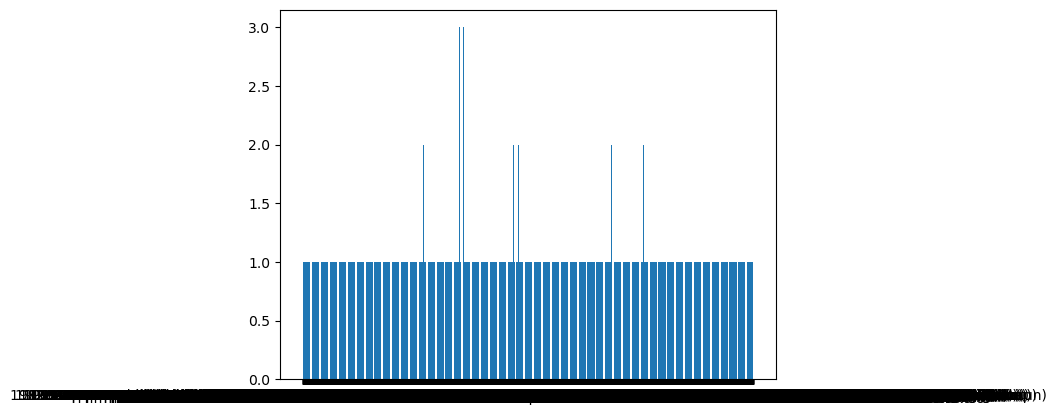

In [124]:
#create a bar chart of the grouped counts

plt.bar(group_counts['Yr/Seas'] + ' - ' + group_counts['Sex'] + ' - ' + group_counts['Name'],
        group_counts['Count'])

Text(0.5, 1.0, 'Grouped Data Counts')

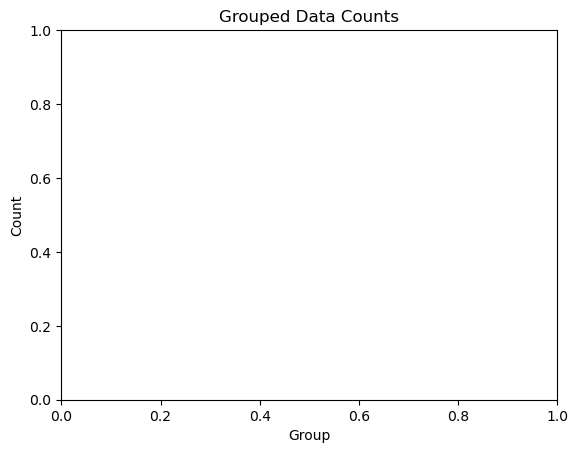

In [125]:
#add labels and titles

plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Grouped Data Counts')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

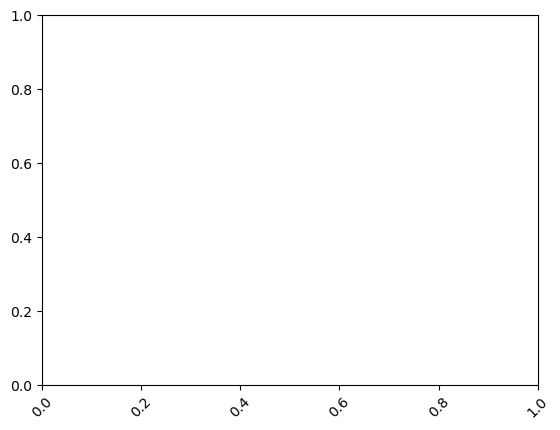

In [126]:
#rotate x-axis label so it is easier to read

plt.xticks(rotation=45)

In [127]:
#Display the chart
plt.show()

In [128]:
#specify the columns for grouping

group_columns = ['Yr/Seas', 'Dth', 'Citizenship']

In [129]:
# Group the data by the specified columns and count occurrences

group_counts = df.groupby(group_columns).size().reset_index(name='Count')

In [130]:
# Print the grouped data for reference

print(group_counts)

       Yr/Seas Dth  Citizenship  Count
0     1953 Spr   .        India      1
1     1953 Spr   .  New Zealand      1
2     1956 Spr   .  Switzerland      4
3     1960 Spr   .        China      3
4     1963 Spr   .        India      1
...        ...  ..          ...    ...
1047  2019 Spr   Y        India      3
1048  2019 Spr   Y      Ireland      1
1049  2019 Spr   Y           UK      1
1050  2019 Spr   Y          USA      2
1051  2020 Spr   .        China     28

[1052 rows x 4 columns]


In [140]:
# Filter rows where 'Dth' contains 'Y'

Y_values = df.loc[df['Dth'].str.contains('Y'), 'Dth']

In [137]:
print(Y_values)

88       Y
96       Y
98       Y
134      Y
149      Y
        ..
9707     Y
9978     Y
10060    Y
10119    Y
10128    Y
Name: Dth, Length: 83, dtype: object


In [138]:
# Count the occurrences of each 'Y' value

Y_counts = Y_values.value_counts()

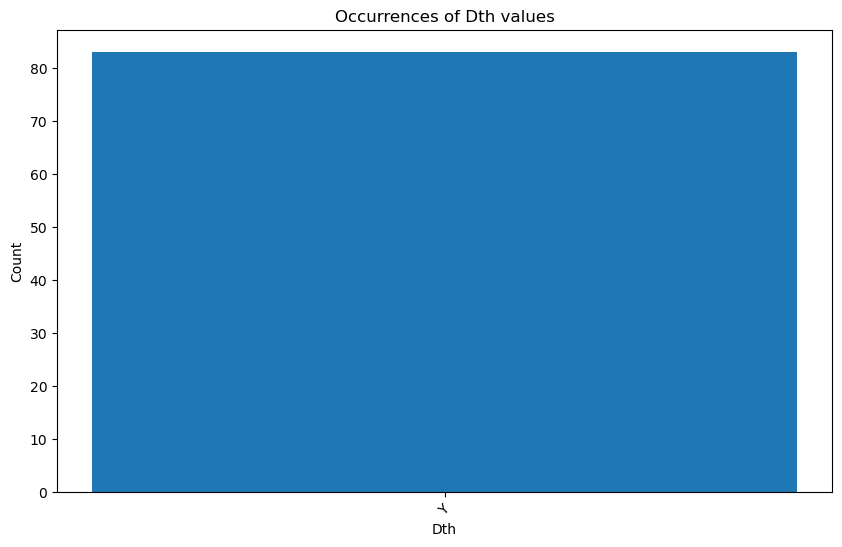

In [139]:
# Create a bar chart

plt.figure(figsize=(10, 6))
plt.bar(Y_counts.index, Y_counts.values)
plt.xlabel('Dth')
plt.ylabel('Count')
plt.title('Occurrences of Dth values')
plt.xticks(rotation=45)
plt.show()

In [131]:
# Group data by number of deaths and count occurrences

season_counts = df['Dth'].value_counts()

<BarContainer object of 2 artists>

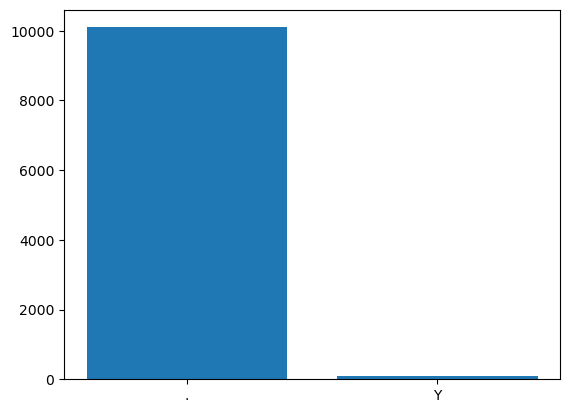

In [132]:
# Create a bar chart of the death counts

plt.bar(season_counts.index, season_counts.values)


Text(0.5, 1.0, 'Peak Occurrences by Dth')

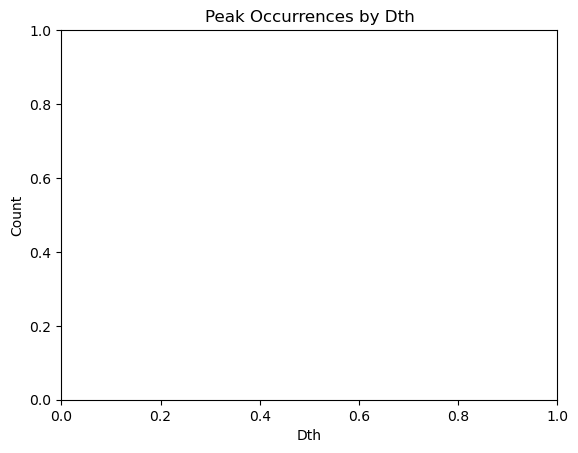

In [133]:
# Add labels and title

plt.xlabel('Dth')
plt.ylabel('Count')
plt.title('Peak Occurrences by Dth')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

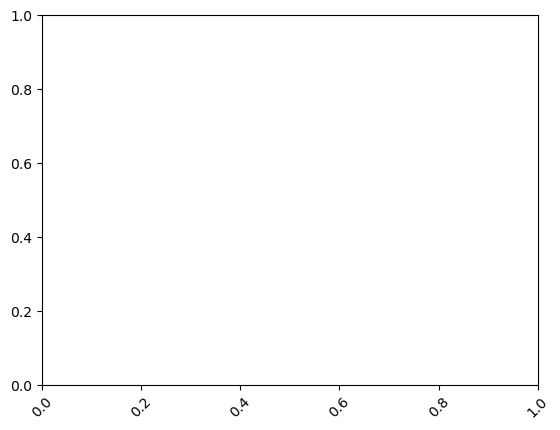

In [134]:
# Rotate x-axis labels for easier reading

plt.xticks(rotation=45)

In [135]:
# Display the chart

plt.show()

In [141]:
#specify the columns for grouping

group_columns = ['Yr/Seas', 'Dth']

In [142]:
# Group the data by the specified columns and count occurrences

group_counts = df.groupby(group_columns).size().reset_index(name='Count')

In [143]:
# Print the grouped data for reference

print(group_counts)

      Yr/Seas Dth  Count
0    1953 Spr   .      2
1    1956 Spr   .      4
2    1960 Spr   .      3
3    1963 Spr   .      6
4    1965 Spr   .      9
..        ...  ..    ...
108  2018 Spr   .    817
109  2018 Spr   Y      2
110  2019 Spr   .    870
111  2019 Spr   Y      8
112  2020 Spr   .     28

[113 rows x 3 columns]


In [145]:
# Get the highest count of deaths

highest_count = df['Dth'].max()


In [146]:
print("The highest count of deaths is:", highest_count)

The highest count of deaths is: Y


In [147]:
# Get the highest count in Yr/Seas

highest_count = df['Yr/Seas'].max()

In [148]:
print("The highest count in Yr/Seas is:", highest_count)


The highest count in Yr/Seas is: 2020 Spr


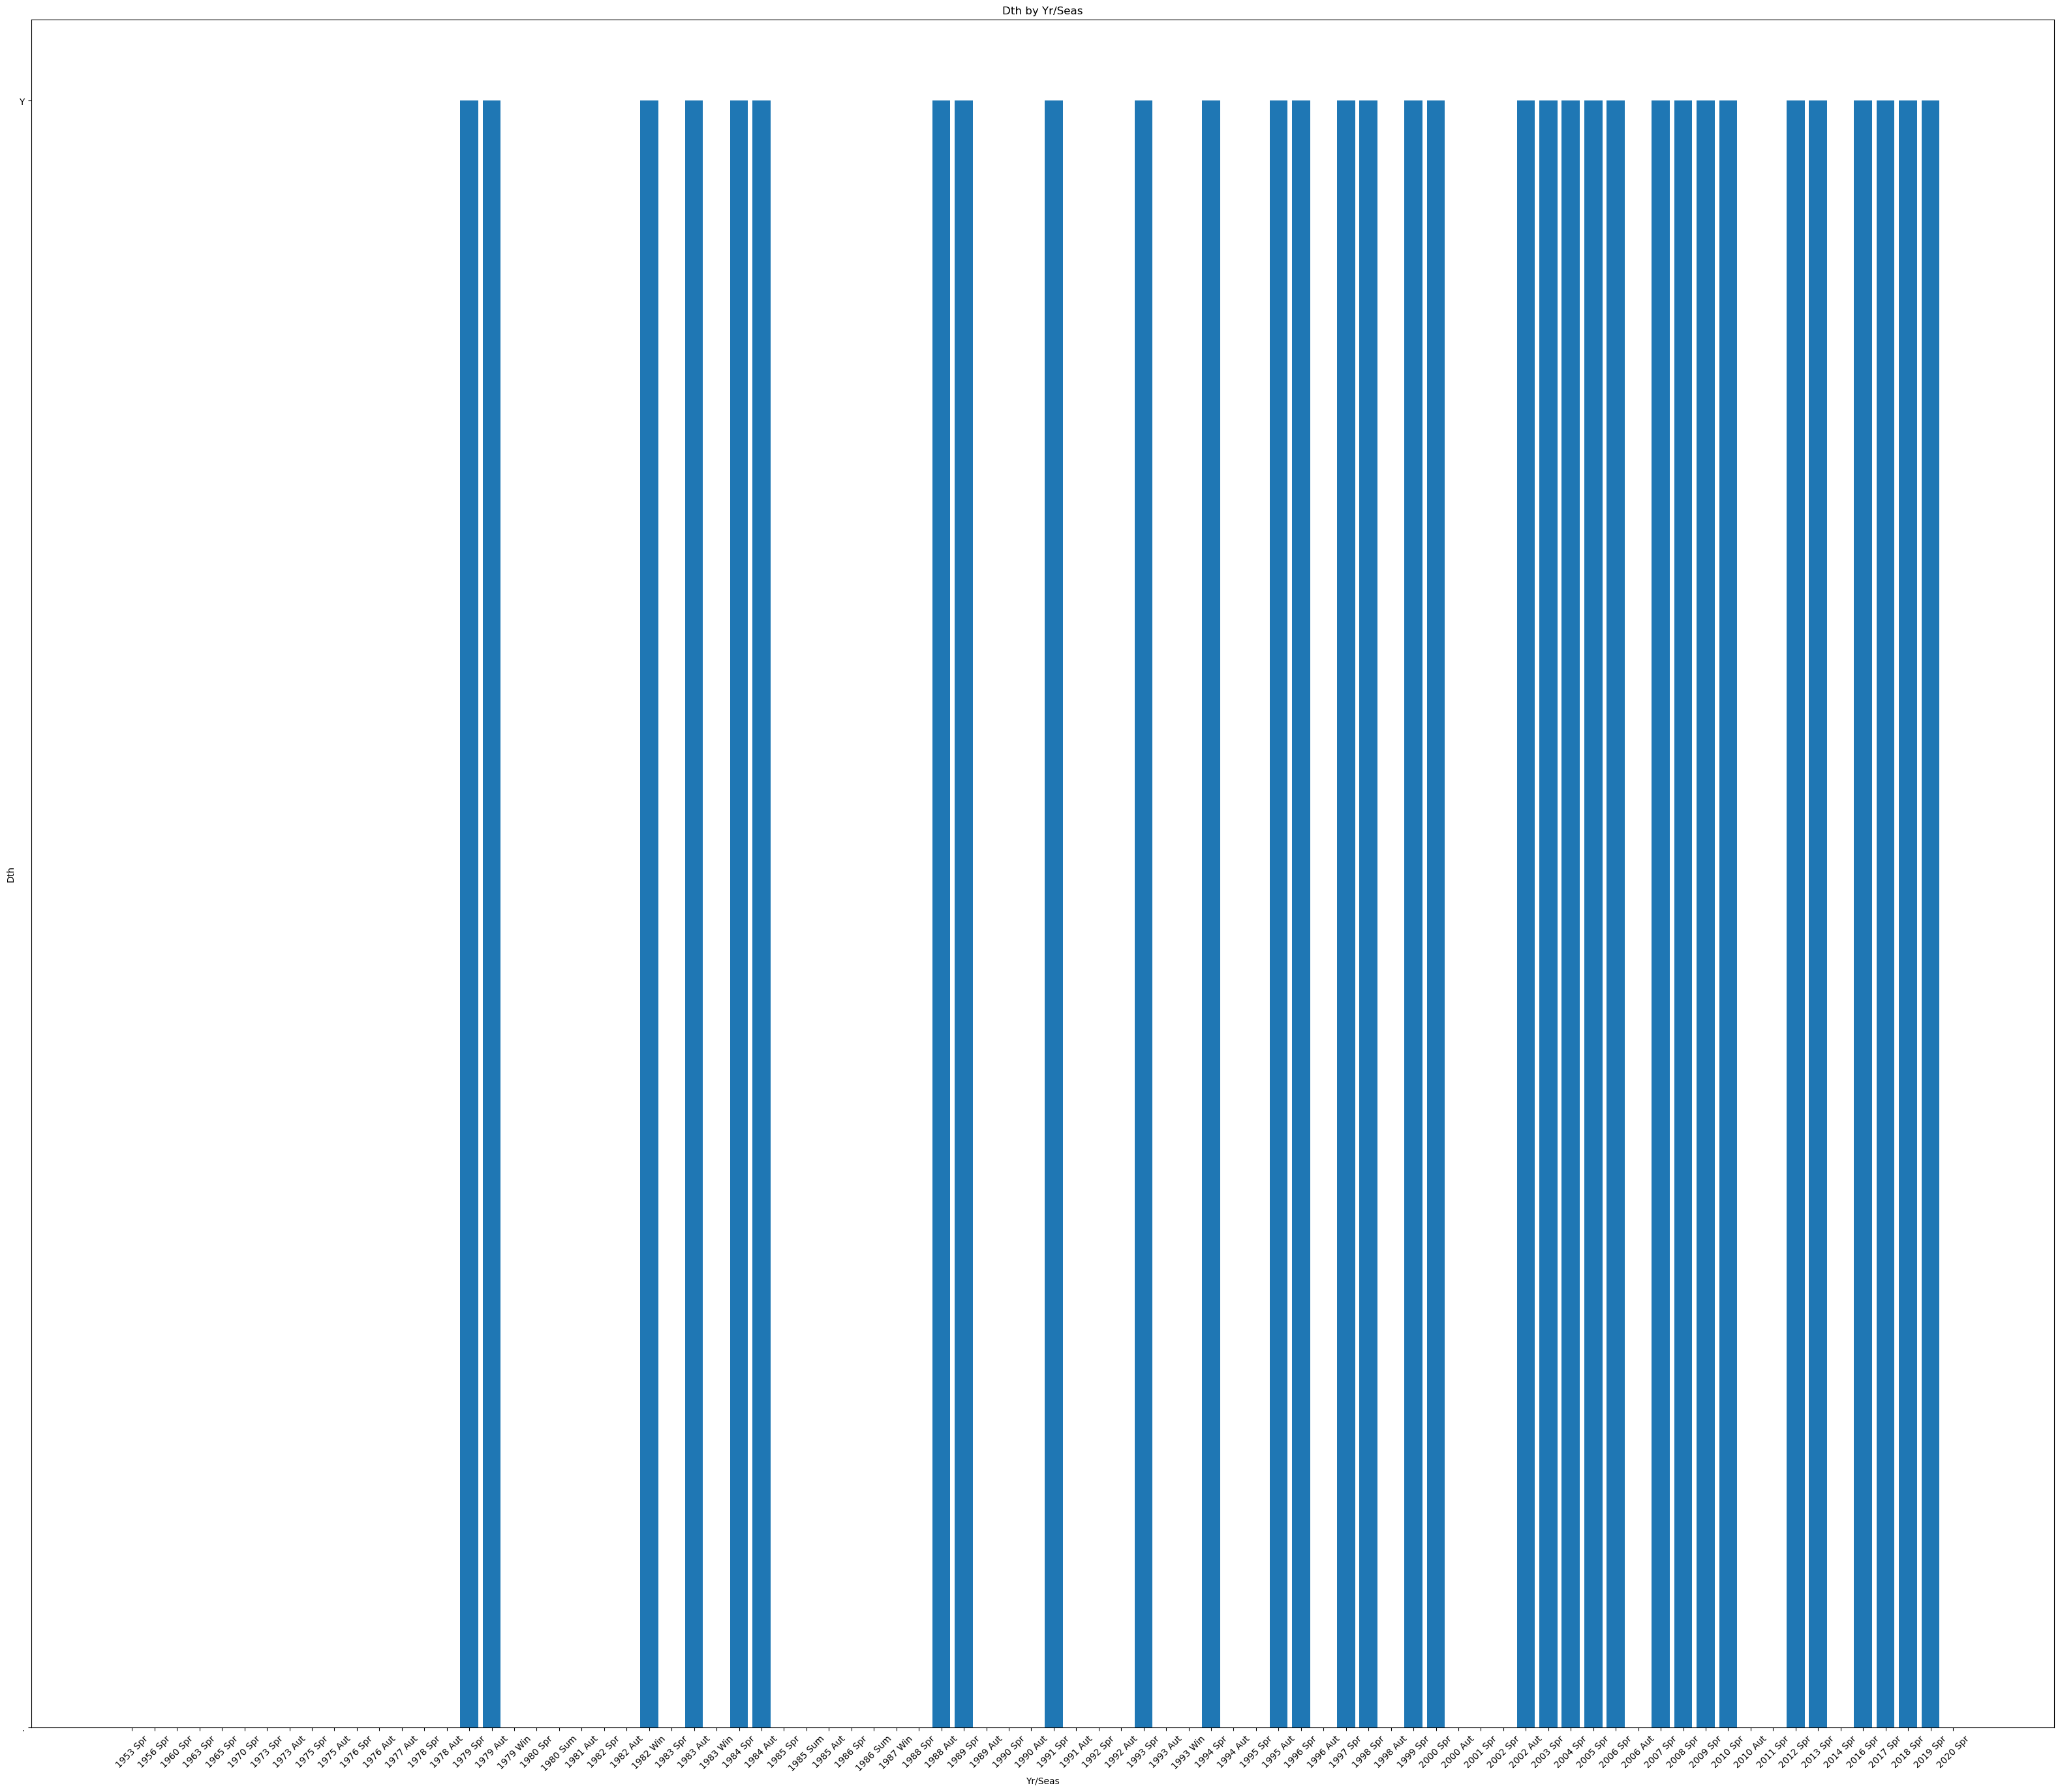

In [152]:
# Create a bar chart

plt.figure(figsize=(40, 34))
plt.bar(df['Yr/Seas'], df['Dth'])
plt.xlabel('Yr/Seas')
plt.ylabel('Dth')
plt.title('Dth by Yr/Seas')
plt.xticks(rotation=45)
plt.show()

In [154]:
import pandas as pd

import plotly.graph_objects as go

In [155]:
# Read the input into a DataFrame

data = {
    'Yr/Seas': ['1953 Spr', '1956 Spr', '1960 Spr', '1963 Spr', '1965 Spr', '2018 Spr', '2018 Spr', '2019 Spr', '2019 Spr', '2020 Spr'],
    'Dth': ['.', '.', '.', '.', '.', '.', 'Y', '.', 'Y', '.'],
    'Count': [2, 4, 3, 6, 9, 817, 2, 870, 8, 28]
    
    }
df = pd.DataFrame(data)

In [156]:
# Filter data for years 2018-2020

df_filtered = df[(df['Yr/Seas'].str.startswith('20')) | (df['Yr/Seas'].str.startswith('201'))]

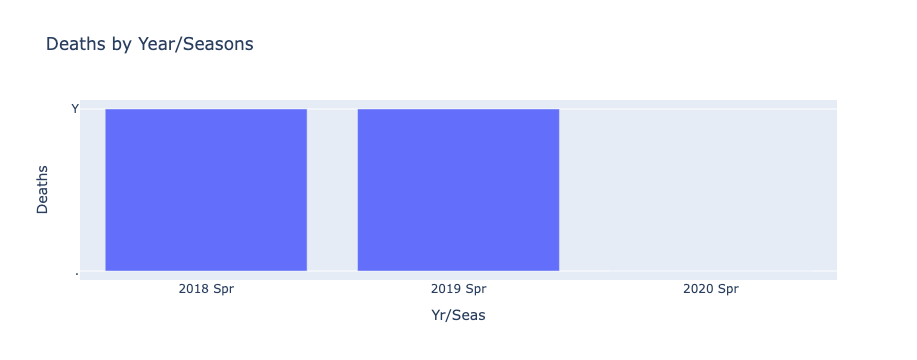

In [159]:
# Create a bar chart using Plotly

fig = go.Figure(data=[
    go.Bar(x=df_filtered['Yr/Seas'], y=df_filtered['Dth'])
])

fig.update_layout(
    title='Deaths by Year/Seasons',
    xaxis_title='Yr/Seas',
    yaxis_title='Deaths'
)

fig.show()

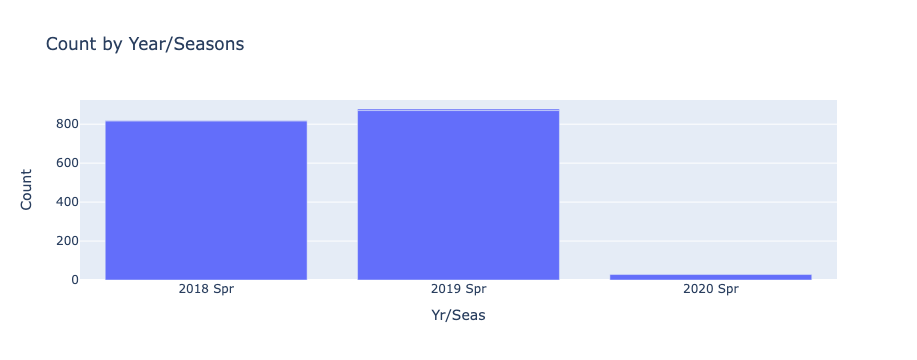

In [160]:
# Create a bar chart using Plotly

fig = go.Figure(data=[
    go.Bar(x=df_filtered['Yr/Seas'], y=df_filtered['Count'])
])

fig.update_layout(
    title='Count by Year/Seasons',
    xaxis_title='Yr/Seas',
    yaxis_title='Count'
)

fig.show()